# Hierarchical Clustering (Simple Demo)

In [6]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

random_s = 101

In [7]:
# Generate Sample Data

X, y = make_blobs(n_samples = 50, centers = 3, random_state = random_s, cluster_std=0.7)

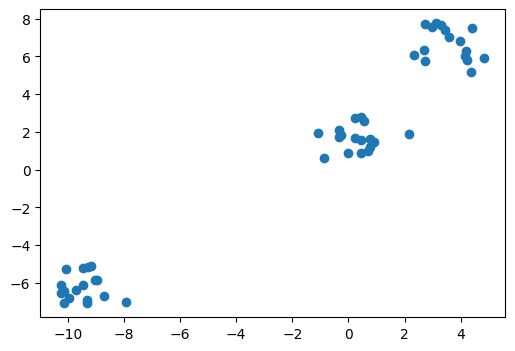

In [15]:
# Visualize the Sample Data

plt.figure(figsize = (6,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [16]:
# Perform Hierarchical Clustering using Ward's method

# Possible values for the method

# a. 'single'       - uses the minimum distance between points among clusters (minimum linkage)
# b. 'complete'     - uses the maximum distance between points among clusters (maximum linkage)
# c. 'average'      - uses the average distance between all points among clusters (Unweighted pair group with arithmetic mean)
# d. 'weighted'     - a variation of the average method that takes the cluster sizes into account (Weighted Pair Group Method with Arithmetic Mean)
# e. 'centroid'     - uses the distance between the centroids (mean positions) of the two clusters (Unweighted Pair Group Method using Centroids)
#                   - can produce clusters with inversions (where clusters are not nested properly).
# f. 'median'       - similar to the centroid method but instead of taking the mean, it uses the median of the points.
#                   - also called Weighted Pair Group Method using Centroids.
# g. 'ward'         - ward's method tends to create clusters that are relatively balanced in size and compact,
#                   - which is why it is often preferred for many clustering tasks.

Z = linkage(X, method = 'ward')

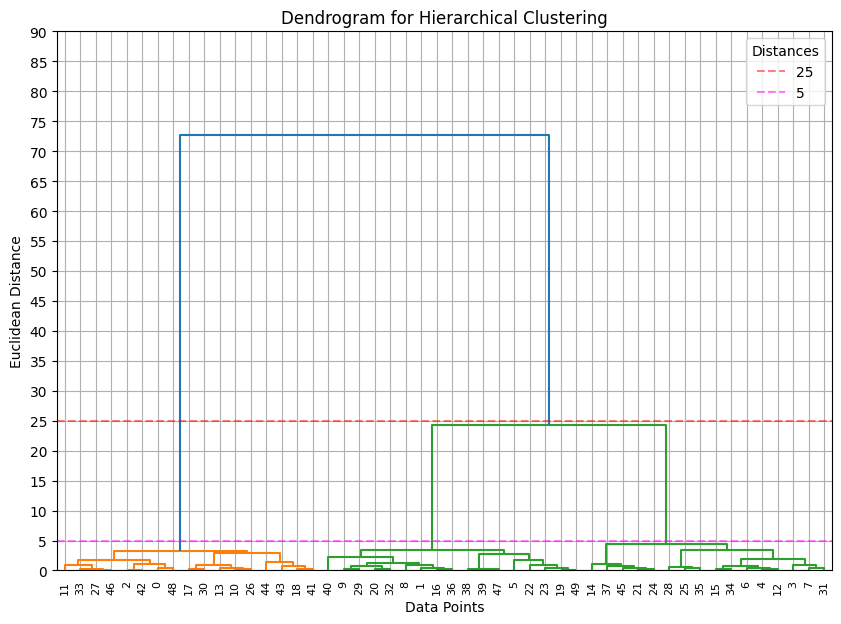

In [53]:
# Plot the dendrogram

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")

# The dendogram
dendrogram(Z)

# Horizontal lines
plt.axhline(y = 25, color = 'red', linestyle = '--', label = '25', alpha = 0.5)
plt.axhline(y = 5, color = 'magenta', linestyle = '--', label = '5', alpha = 0.5)

plt.ylim(0, 90)  # Set the range of the y-axis from 0 to n
plt.yticks(np.arange(0, 91, 5))  # Set the y-ticks every 5 units

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.legend(title = 'Distances')
plt.grid()
plt.show()

In [ ]:
# Interpreting the Dendrogram

# Understanding the Dendrogram:

# Each leaf represents a data point.
# The vertical lines show the distance (or dissimilarity) at which clusters are merged.
# The height of the line represents the distance between clusters before they were merged.

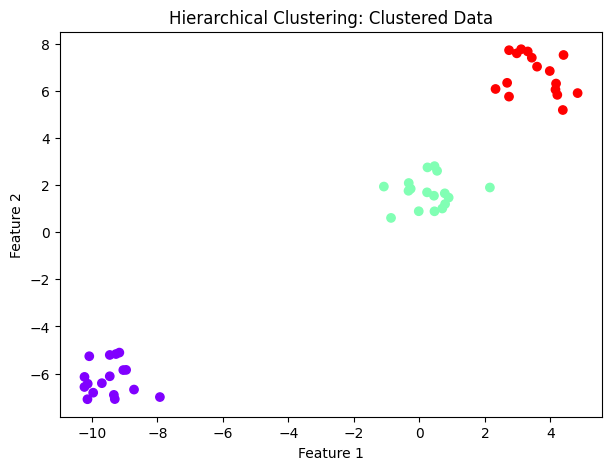

In [24]:
from scipy.cluster.hierarchy import fcluster # Agglomerative Clustering with fcluster

# Define a threshold to cut the dendrogram and form clusters

max_distance = 7

clusters = fcluster(Z, max_distance, criterion = 'distance')

# Plot the points colored by cluster

plt.figure(figsize=(7, 5))

plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap = 'rainbow')
plt.title("Hierarchical Clustering: Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [32]:
# Calculate the number of clusters for different thereshold values

cluster_counts = []
thresholds = np.arange(4, 30).tolist()

for t in thresholds:

    clusters = fcluster(Z, t, criterion = 'distance')
    num_clusters = len(set(clusters))
    cluster_counts.append((t, num_clusters))

cluster_counts

[(4, 4),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (10, 3),
 (11, 3),
 (12, 3),
 (13, 3),
 (14, 3),
 (15, 3),
 (16, 3),
 (17, 3),
 (18, 3),
 (19, 3),
 (20, 3),
 (21, 3),
 (22, 3),
 (23, 3),
 (24, 3),
 (25, 2),
 (26, 2),
 (27, 2),
 (28, 2),
 (29, 2)]

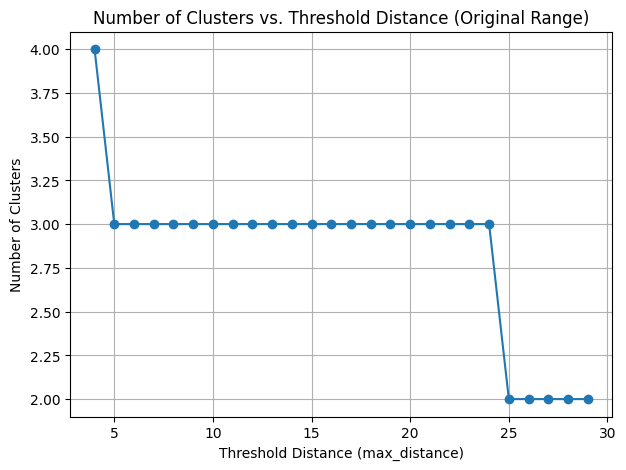

In [39]:
# In visualization

# Plotting the original cluster_counts from the earlier threshold range

# Extract the threshold values and corresponding cluster counts from cluster_counts

threshold_values, cluster_numbers = zip(*cluster_counts) # tuple unpacking

# Create a plot to visualize the number of clusters for the original threshold values

plt.figure(figsize=(7, 5))
plt.plot(threshold_values, cluster_numbers, marker='o', linestyle='-')
plt.title("Number of Clusters vs. Threshold Distance (Original Range)")
plt.xlabel("Threshold Distance (max_distance)")
plt.ylabel("Number of Clusters")
plt.grid(True)
plt.show()

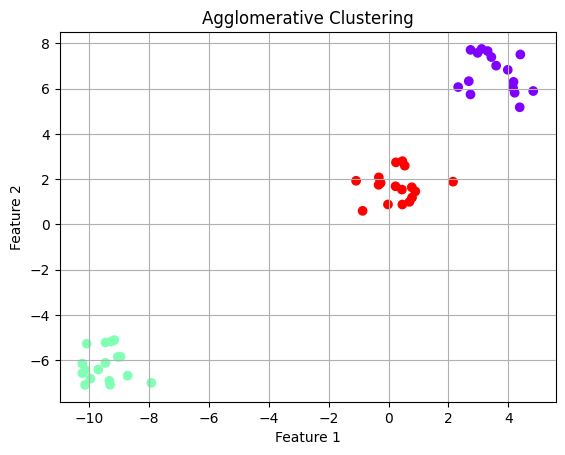

In [57]:
# Or used the Agglomerative Clustering as alternative
# Create an Agglomerative Clustering model

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

# Fit the model and predict the clusters
clusters = agg_clustering.fit_predict(X)

# Plot the clustered data

plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()